### Load and preprocessing images  

In [1]:
import os
import cv2
import numpy as np
import random
from PIL import Image
import matplotlib.pyplot as plt
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split

# The address of the folder where the images are located
path = "C:\\Users\\Amin\\Desktop\\Mask"

images = []
labels = []
image_list = os.listdir(path)
image_size = 64
for image_name in image_list: 
    image_path = os.path.join(path, image_name)
    image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    image = cv2.resize(image, (image_size,image_size)) 
    image = image.astype('float32')         
    image = image / 255.0                           
    images.append(image)
    labels.append(image_name[-5])
np.unique(labels)

array(['0', '1'], dtype='<U1')

### Separate x and y data

In [2]:
images = np.array(images)
labels = to_categorical(labels, num_classes=2)

print("images: ",images.shape)
print("Labels: ",labels.shape)
print(labels)

images:  (1238, 64, 64)
Labels:  (1238, 2)
[[1. 0.]
 [1. 0.]
 [1. 0.]
 ...
 [1. 0.]
 [1. 0.]
 [1. 0.]]


### Separate train and test data

In [3]:
train_images, test_images, train_labels, test_labels = train_test_split(images, labels, test_size=0.2, random_state=84)

print("train_images: ",train_images.shape)
print("test_images:  ",test_images.shape)
print("train_labels: ",train_labels.shape)
print("test_labels:  ",test_labels.shape)

train_images:  (990, 64, 64)
test_images:   (248, 64, 64)
train_labels:  (990, 2)
test_labels:   (248, 2)


### Modeling

In [4]:
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K
from keras.optimizers import SGD 

# create model
model = Sequential()
model.add(Conv2D(32 , kernel_size =(9,9) , activation='relu' , input_shape=(image_size,image_size,1) ))
model.add(MaxPooling2D((2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(64 , (9,9) , activation='relu'))
model.add(MaxPooling2D((2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(128 , (9,9) , activation='relu'))
model.add(MaxPooling2D((2,2)))
model.add(Dropout(0.25))

# model.add(Conv2D(256 , (3,3) , activation='relu'))
# model.add(MaxPooling2D((2,2)))
# model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(2, activation='softmax'))

model.compile(loss = 'categorical_crossentropy',
              optimizer = SGD(0.001),
              metrics = ['accuracy'])

print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 56, 56, 32)        2624      
                                                                 
 max_pooling2d (MaxPooling2  (None, 28, 28, 32)        0         
 D)                                                              
                                                                 
 dropout (Dropout)           (None, 28, 28, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 20, 20, 64)        165952    
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 10, 10, 64)        0         
 g2D)                                                            
                                                                 
 dropout_1 (Dropout)         (None, 10, 10, 64)        0

In [5]:
cnn = model.fit(train_images, train_labels, epochs=20,
                    validation_data=(test_images, test_labels))

Epoch 1/20
31/31 [==============================] - 2s 68ms/step - loss: 0.7028 - accuracy: 0.4990 - val_loss: 0.6649 - val_accuracy: 0.8145
Epoch 2/20
31/31 [==============================] - 2s 65ms/step - loss: 0.6560 - accuracy: 0.6828 - val_loss: 0.6286 - val_accuracy: 0.8145
Epoch 3/20
31/31 [==============================] - 2s 66ms/step - loss: 0.6225 - accuracy: 0.7253 - val_loss: 0.5995 - val_accuracy: 0.8145
Epoch 4/20
31/31 [==============================] - 2s 68ms/step - loss: 0.6032 - accuracy: 0.7404 - val_loss: 0.5759 - val_accuracy: 0.8145
Epoch 5/20
31/31 [==============================] - 2s 67ms/step - loss: 0.5905 - accuracy: 0.7424 - val_loss: 0.5588 - val_accuracy: 0.8145
Epoch 6/20
31/31 [==============================] - 2s 66ms/step - loss: 0.5843 - accuracy: 0.7404 - val_loss: 0.5469 - val_accuracy: 0.8145
Epoch 7/20
31/31 [==============================] - 2s 68ms/step - loss: 0.5798 - accuracy: 0.7404 - val_loss: 0.5397 - val_accuracy: 0.8145
Epoch 8/20
31

### evaluation

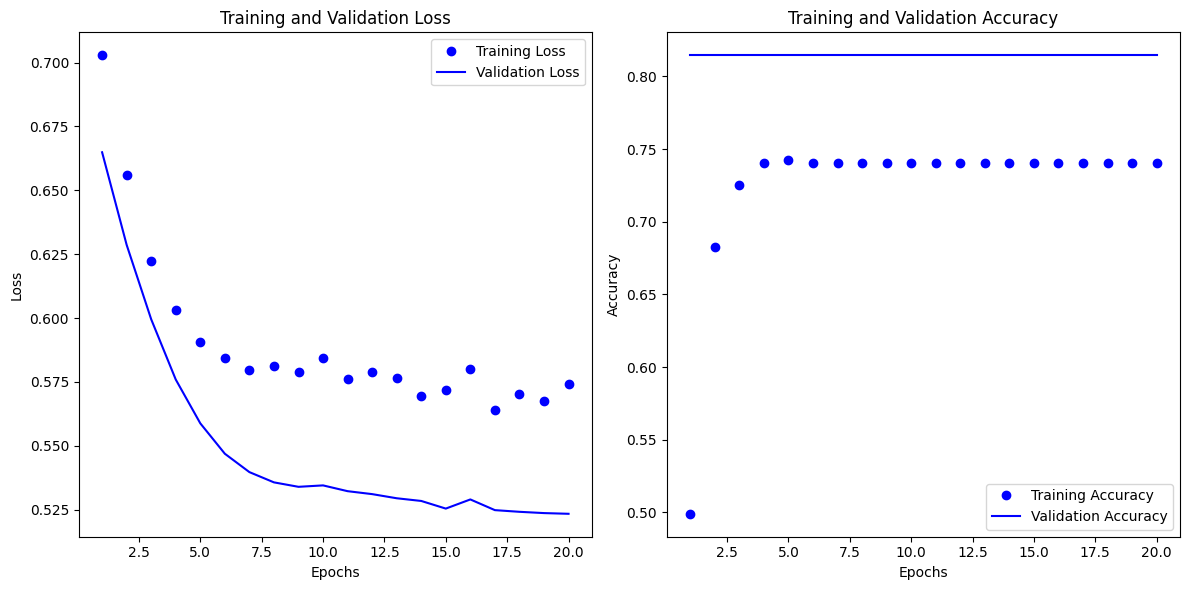

In [6]:
train_loss = cnn.history['loss']
val_loss = cnn.history['val_loss']
train_acc = cnn.history['accuracy']
val_acc = cnn.history['val_accuracy']

epochs = range(1, len(train_loss) + 1)

plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.plot(epochs, train_loss, 'bo', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(epochs, train_acc, 'bo', label='Training Accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()

### save the model

In [7]:
model.save('Lung_Segmentation.h5')

C:\Users\Amin\AppData\Roaming\Python\Python39\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
